# VARX scratch with real-world dataset
[data-ref](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+)

## data prepare

In [1]:
import pandas as pd
from VARX import VARX

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-azyw5npp because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
train = pd.read_csv('datatraining.txt')
train.corr()

# corr('Temperature', 'Light') = 0.65
# train_data = train_data[['Temperature', 'Light']]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


## model define
$y(t) = a_0 + \sum_{i=1}^{n} a_i*y(t-i) + \sum_{j=0}^{m} b_j*u(t-k-j)$

## training

In [3]:
# data and dependent data
train_data = train['Temperature'].to_numpy()
train_data_exog = train['Light'].to_numpy()

epoch 0, RMSE=13.72
epoch 1, RMSE=8.513
epoch 2, RMSE=5.307
epoch 3, RMSE=3.308
epoch 4, RMSE=2.062
epoch 5, RMSE=1.286
epoch 6, RMSE=0.802
epoch 7, RMSE=0.5
epoch 8, RMSE=0.313
epoch 9, RMSE=0.196
epoch 10, RMSE=0.125
epoch 11, RMSE=0.081
epoch 12, RMSE=0.056
epoch 13, RMSE=0.043
epoch 14, RMSE=0.036
epoch 15, RMSE=0.033
epoch 16, RMSE=0.032
epoch 17, RMSE=0.031
epoch 18, RMSE=0.031
epoch 19, RMSE=0.031
epoch 20, RMSE=0.031
epoch 21, RMSE=0.031
epoch 22, RMSE=0.031
epoch 23, RMSE=0.031
epoch 24, RMSE=0.031


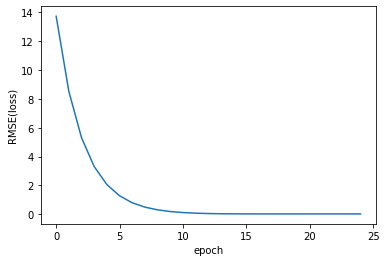

In [4]:
model = VARX()
y_hat = model.training(data = train_data, data_exog = train_data_exog, lr = 10**-7, epoch = 25)
model.plot_rmse()

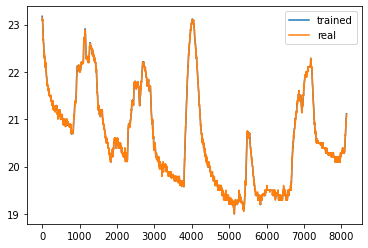

In [5]:
import matplotlib.pyplot as plt
plt.plot(y_hat, label='trained')
plt.plot(train_data[2:], label='real')
plt.legend()

## test

In [6]:
test = pd.read_csv('datatest.txt')
test.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,0.716988,0.768428,0.870226,0.894548,0.705784
Humidity,0.716988,1.000000,0.561905,0.911611,0.951914,0.610764
Light,0.768428,0.561905,1.000000,0.769167,0.693286,0.927949
CO2,0.870226,0.911611,0.769167,1.000000,0.964440,0.768030
HumidityRatio,0.894548,0.951914,0.693286,0.964440,1.000000,0.700330
Occupancy,0.705784,0.610764,0.927949,0.768030,0.700330,1.000000


In [7]:
# data and dependent data
test_data = test['Temperature'].to_numpy()
test_data_exog = test['Light'].to_numpy()

In [8]:
y_pred = model.prediction(data = test_data, data_exog = test_data_exog)

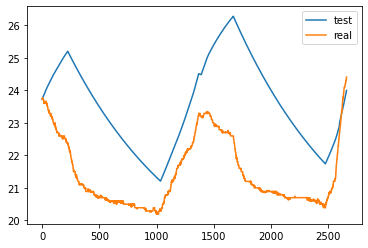

In [9]:
import matplotlib.pyplot as plt
plt.plot(y_pred, label='test')
plt.plot(test_data[2:], label='real')
plt.legend()